In [208]:
import copy
#packages we'll need

%matplotlib inline 
#this is a ``magic command'' specific to display plots in-line in a jupyter notebook
#normally you would plot by calling a plt.show()


from matplotlib.colors import LogNorm
#need this for the colourbar of the 2D histogram


%run DataAnalysis.ipynb

In [209]:
data = DataAnalysis()
data.load_eventdf('data/new_moo/8-4/events.csv')
data.load_clusterdf('data/new_moo/8-4/clusters.csv')

data.filter_fit(3.5,5)

In [214]:
data.get_clusterdf()

,Cluster,Events,Channels,StartTime,TimeSpread,NRMSE,Zenith,Azimuth,ExtraCh,MissingCh,dEdx,dEdx_err,Fitline
0,0,7,7,5116.891,0.490,1.015345,0.443027,-0.949301,0,0,838.014931,0.851513,"[-30.790413, -184.449602, 305.84923, -0.407345..."
1,1,6,6,7194.337,0.502,0.728748,0.393106,-0.825738,0,0,1.000000,0.000000,"[117.445196, 50.223419, 237.601195, -0.37593, ..."
3,3,6,5,26158.403,0.232,1.784798,0.398708,-0.934786,0,1,352.707310,-0.662124,"[335.857074, -110.982684, 148.6988, -0.370626,..."
4,4,6,6,27250.906,1.288,1.155637,0.978274,-1.067650,0,0,578.462988,0.999554,"[129.711534, 275.167356, -355.454939, 0.75223,..."
5,5,6,6,29660.033,0.226,1.258569,0.608168,0.622358,0,0,1908.097815,0.814916,"[189.840518, -247.277554, 64.832826, 0.177524,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,500,11,8,2710760.519,0.903,2.270703,0.611326,-0.664071,6,4,218.262916,0.751547,"[335.228667, 151.207486, -349.995542, -0.57366..."
502,502,11,11,2728511.764,0.730,0.967608,0.560068,-1.384926,1,0,554.922378,0.711369,"[-29.87501, -274.303326, 300.21598, -0.387828,..."
504,504,8,8,2747006.328,0.537,0.954923,1.164193,1.158456,0,0,903.036580,0.999989,"[-45.877867, 331.324929, -164.726161, 0.200587..."
505,505,5,5,2747961.339,0.108,1.504924,1.011455,0.100111,0,1,695.108885,0.988730,"[-324.346119, -201.913343, -305.894937, 0.6301..."


In [211]:
data.get_clusterdf()[data.get_clusterdf()['dEdx_err'] > .9].head(10)

,Cluster,Events,Channels,StartTime,TimeSpread,NRMSE,Zenith,Azimuth,ExtraCh,MissingCh,dEdx,dEdx_err,Fitline
4,4,6,6,27250.906,1.288,1.155637,0.978274,-1.067650,0,0,578.462988,0.999554,"[129.711534, 275.167356, -355.454939, 0.75223,..."
6,6,8,8,37039.429,0.846,1.393672,0.765107,-1.285709,0,1,762.143880,0.999916,"[127.104943, -246.333983, -119.619883, -0.5500..."
11,11,12,12,88352.211,0.822,0.841981,0.704244,0.936450,0,0,455.079900,0.982044,"[-105.604593, 124.165164, -344.453692, -0.0011..."
21,21,10,10,105766.799,0.711,1.643246,1.073859,-1.174873,0,2,318.971027,0.920945,"[264.098029, -15.544555, -207.217527, -0.75289..."
23,23,7,7,112738.540,0.253,0.831929,0.392366,-1.528959,0,0,457.606916,0.999998,"[44.466106, 344.896929, 299.539931, 0.23875, -..."
24,24,7,7,127218.780,0.746,0.878543,0.351531,1.265833,0,0,474.291548,0.999891,"[22.416036, 181.195288, -242.827017, 0.110779,..."
30,30,12,12,161379.095,0.567,0.970242,0.134586,0.029124,1,2,516.542486,0.999324,"[180.151385, 59.355277, 99.349877, -0.105867, ..."
33,33,7,7,165935.248,0.473,1.381855,0.466559,-1.187739,0,1,705.639717,0.999999,"[32.86442, 249.92629, 248.75843, -0.382244, 0...."
34,34,11,11,170976.126,0.589,1.878267,0.508699,0.829854,1,2,814.889862,0.987185,"[37.380558, -31.10975, 131.360479, 0.052709, 0..."
39,39,7,7,186192.981,0.193,1.029369,0.678385,-1.140958,0,0,543.377324,0.970785,"[110.872942, 180.527991, -108.015246, -0.54815..."


In [212]:
large_non_sats = []
for c in data.get_clusterdf()['Cluster'].values:
    cluster = data.get_cluster(c)
    r2 = data.get_clusterdf()[data.get_clusterdf()['Cluster'] == c]['dEdx_err'].values[0]
    
    if len(cluster[(cluster['IsSaturated']==False) & (cluster['Hit'])==True]) == 1: #and r2 > .5:
        large_non_sats.append(c)

np.array(large_non_sats)

array([  1,  25,  31,  37,  46,  55,  78,  92, 120, 122, 128, 136, 168,
       178, 191, 192, 243, 250, 268, 282, 287, 319, 329, 331, 332, 348,
       350, 361, 363, 366, 370, 371, 372, 389, 393, 400, 413, 429, 461,
       490])

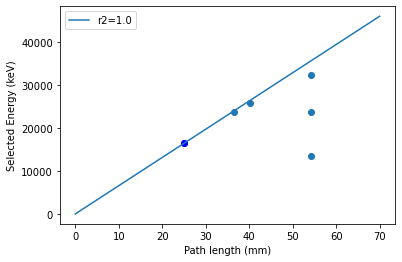

(655.867692413429, 1.0)

In [213]:
c = 1
plt.scatter(data.get_cluster(c)['PathLength'], data.get_cluster(c)['SelectedEnergy'])

fitline = data.get_clusterdf()[data.get_clusterdf()['Cluster'] == c]['Fitline'].values[0]
data.dEdx(data.get_cluster(c), fitline, show_graph=True)

In [68]:
data.get_cluster(c)

,Run,Channel,Time,NumPulses,OFdelay,MaxPosInWindow,SelectedEnergy,Baseline,MaxToBaseline,StabAmp,IsSaturated,MaxTime,Cluster,Hit,PathLength
53,350259,707,37036.432,1,3.136918,2.997,37930.497660,-4028.634333,13519.345545,5.025003e+04,True,37039.429,6,True,57.266418
54,350259,706,37036.464,1,3.151172,3.143,7794.894927,-3740.505478,2878.135941,9.729928e+03,False,37039.607,6,True,10.189542
55,350259,576,37036.480,1,3.168065,3.153,4376.814883,-3605.377223,3935.585047,6.591513e+03,False,37039.633,6,False,NaN
56,350259,721,37036.488,1,3.192386,3.178,13012.558545,-4041.118037,9931.826960,1.718254e+04,False,37039.666,6,True,17.096301
57,350259,821,37036.464,1,3.183583,3.352,25912.702985,-4415.836965,14053.948079,9.999999e+06,True,37039.816,6,True,20.990002
58,350259,795,37036.496,1,3.199371,3.344,17806.001931,-3285.938741,12869.656087,2.313640e+04,True,37039.840,6,True,24.425692
59,350259,822,37036.448,1,3.167238,3.399,33034.330383,-5505.437800,15138.101527,9.999999e+06,True,37039.847,6,True,58.822492
60,350259,794,37036.472,1,3.330687,3.803,20868.705948,-3592.474426,13226.500000,2.508393e+04,True,37040.275,6,True,48.573843


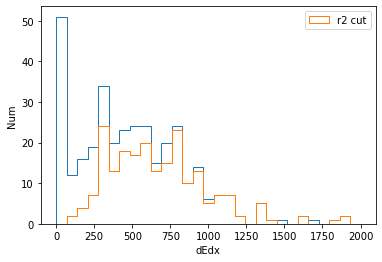

In [91]:
df = data.get_clusterdf()[data.get_clusterdf()['dEdx_err'] > .2]

array = plt.hist(data.get_clusterdf()['dEdx'], np.linspace(0,2000,30), histtype='step')
array = plt.hist(df['dEdx'], np.linspace(0,2000,30), histtype='step', label='r2 cut')
plt.xlabel("dEdx")
plt.ylabel("Num")
plt.legend()

Text(0, 0.5, 'Num')

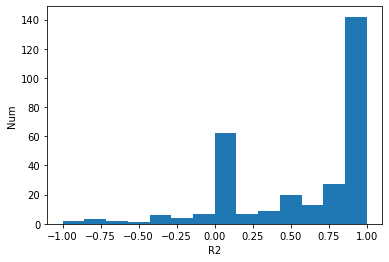

In [178]:
array = plt.hist(data.get_clusterdf()['dEdx_err'], np.linspace(-1,1,15))
plt.xlabel("R2")
plt.ylabel("Num")

Text(0, 0.5, 'R2')

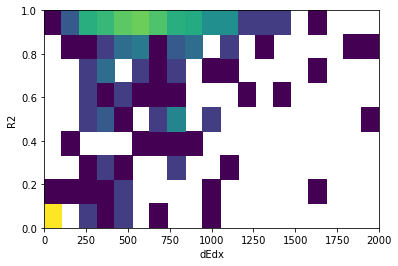

In [148]:
array = plt.hist2d(data.get_clusterdf()['dEdx'], data.get_clusterdf()['dEdx_err'],  [np.linspace(0,2000,20), np.linspace(0,1,10)], norm=LogNorm())
plt.xlabel("dEdx")
plt.ylabel("R2")

In [99]:
noisydata = copy.deepcopy(data)

In [100]:
#data.filter_noisy()

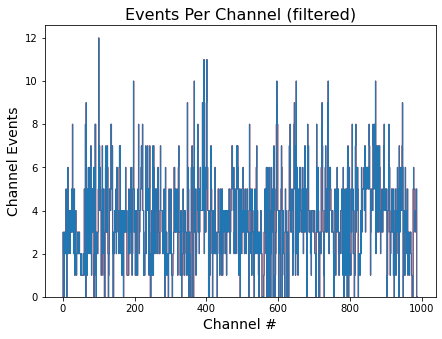

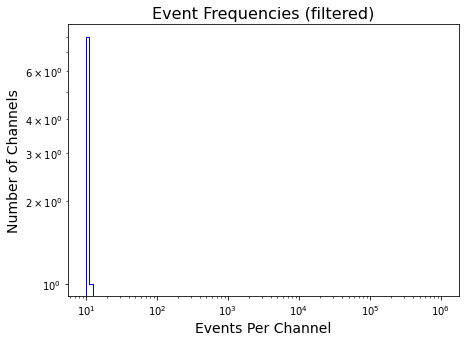

In [101]:
plt.figure(figsize=(7,5)) # lets you make a custom size for your plot
array1=plt.hist(noisydata.get_eventdf()['Channel'].values, np.linspace(0,989,990) , histtype='step', color='r')#np.linspace function is hlepful for generating bins
array2=plt.hist(data.get_eventdf()['Channel'].values, np.linspace(0,989,990), histtype='step')#np.linspace function is hlepful for generating bins
plt.title("Events Per Channel (filtered)", fontsize=16)
plt.xlabel('Channel #',fontsize=14)
plt.ylabel('Channel Events',fontsize=14)
#plt.gca().set_yscale("log")
#plt.ylim(1,200)


#plt.savefig('plots/pdf/EventsPerChannel.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/EventsPerChannel.png',dpi=300,bbox_inches = "tight")


plt.figure(figsize=(7,5))
plt.hist(array1[0], np.logspace(1,6,100), histtype='step', color='r')
plt.hist(array2[0], np.logspace(1,6,100),color='b', histtype='step')
plt.title("Event Frequencies (filtered)",fontsize=16)
plt.xlabel('Events Per Channel',fontsize=14)
plt.ylabel('Number of Channels',fontsize=14)
plt.gca().set_yscale("log")
plt.gca().set_xscale("log")


#plt.savefig('plots/pdf/EventFrequency.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/EventFrequency.png',dpi=300,bbox_inches = "tight")

In [102]:
quietdata = copy.deepcopy(data)

In [103]:
#data.filter_baseline()

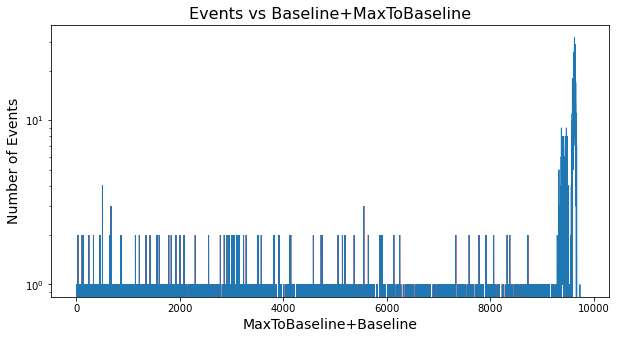

In [104]:
plt.figure(figsize=(10,5)) # lets you make a custom size for your plot
#plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Events vs Baseline+MaxToBaseline", fontsize=16)

plt.ylabel('Number of Events',fontsize=14)
plt.xlabel('MaxToBaseline+Baseline',fontsize=14)
plt.hist(quietdata.get_eventdf()['MaxToBaseline'].values+quietdata.get_eventdf()['Baseline'].values, np.linspace(0,9000,9001), histtype='step', color='r')
array=plt.hist(data.get_eventdf()['MaxToBaseline'].values+data.get_eventdf()['Baseline'].values, np.linspace(0,9800,9801), histtype='step')
plt.gca().set_yscale("log")

plt.savefig('plots/pdf/Baseline_MaxToBaseline.pdf',bbox_inches = "tight")
plt.savefig('plots/png/Baseline_MaxToBaseline.png',dpi=300,bbox_inches = "tight")

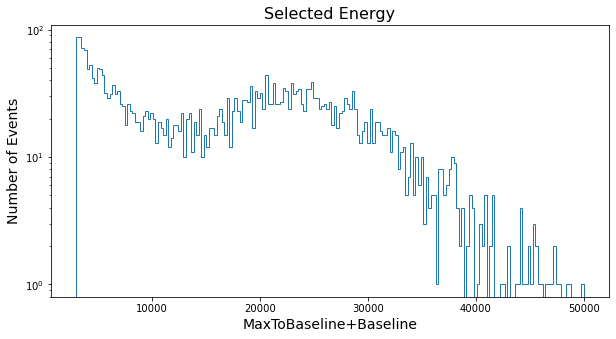

In [105]:
plt.figure(figsize=(10,5)) # lets you make a custom size for your plot
#plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Selected Energy", fontsize=16)

plt.ylabel('Number of Events',fontsize=14)
plt.xlabel('MaxToBaseline+Baseline',fontsize=14)
#plt.hist(quietdata.get_eventdf()['MaxToBaseline'].values+quietdata.get_eventdf()['Baseline'].values, np.linspace(0,9000,9001), histtype='step', color='r')
array=plt.hist(data.get_eventdf()['SelectedEnergy'].values, np.linspace(3000,50000,200), histtype='step')
#array=plt.hist(data.get_cluster(0)['SelectedEnergy'].values, np.linspace(3000,50000,200), histtype='step')


plt.gca().set_yscale("log")


In [106]:
#data = DataAnalysis(load=True, eventfile='data/big_boi/bigeventdf.csv', clusterfile='data/big_boi/bigclusterdf.csv')

In [107]:
#event_threshold = 5
#time_threshold = 1

#data.arrange_clusters(event_threshold, time_threshold)
#data.make_clusterDF()

In [108]:
messydata = copy.deepcopy(data)

In [109]:
messydata.get_clusterdf()

,Cluster,Events,Channels,StartTime,TimeSpread,NRMSE,Zenith,Azimuth,ExtraCh,MissingCh,dEdx,dEdx_err,Fitline
0,0,7,7,5116.891,0.490,1.015345,0.443027,-0.949301,0,0,838.014931,0.851513,"[-30.790413, -184.449602, 305.84923, -0.407345..."
1,1,6,6,7194.337,0.502,0.728748,0.393106,-0.825738,0,0,1.000000,0.000000,"[117.445196, 50.223419, 237.601195, -0.37593, ..."
3,3,6,5,26158.403,0.232,1.784798,0.398708,-0.934786,0,1,352.707310,-0.662124,"[335.857074, -110.982684, 148.6988, -0.370626,..."
4,4,6,6,27250.906,1.288,1.155637,0.978274,-1.067650,0,0,578.462988,0.999554,"[129.711534, 275.167356, -355.454939, 0.75223,..."
5,5,6,6,29660.033,0.226,1.258569,0.608168,0.622358,0,0,1908.097815,0.814916,"[189.840518, -247.277554, 64.832826, 0.177524,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,500,11,8,2710760.519,0.903,2.270703,0.611326,-0.664071,6,4,218.262916,0.751547,"[335.228667, 151.207486, -349.995542, -0.57366..."
502,502,11,11,2728511.764,0.730,0.967608,0.560068,-1.384926,1,0,554.922378,0.711369,"[-29.87501, -274.303326, 300.21598, -0.387828,..."
504,504,8,8,2747006.328,0.537,0.954923,1.164193,1.158456,0,0,903.036580,0.999989,"[-45.877867, 331.324929, -164.726161, 0.200587..."
505,505,5,5,2747961.339,0.108,1.504924,1.011455,0.100111,0,1,695.108885,0.988730,"[-324.346119, -201.913343, -305.894937, 0.6301..."


In [110]:
print("Messy cluster rate: " + str(messydata.get_clusterrate()))
data.filter_fit(3.5, 5) #(NRMSE, channels)
print("Filtered cluster rate: " + str(data.get_clusterrate()))

clusters: 345
run time: 2636943.0
Messy cluster rate: 0.00013083331721618557
clusters: 345
run time: 2636943.0
Filtered cluster rate: 0.00013083331721618557


In [111]:
data.get_clusterdf()

,Cluster,Events,Channels,StartTime,TimeSpread,NRMSE,Zenith,Azimuth,ExtraCh,MissingCh,dEdx,dEdx_err,Fitline
0,0,7,7,5116.891,0.490,1.015345,0.443027,-0.949301,0,0,838.014931,0.851513,"[-30.790413, -184.449602, 305.84923, -0.407345..."
1,1,6,6,7194.337,0.502,0.728748,0.393106,-0.825738,0,0,1.000000,0.000000,"[117.445196, 50.223419, 237.601195, -0.37593, ..."
3,3,6,5,26158.403,0.232,1.784798,0.398708,-0.934786,0,1,352.707310,-0.662124,"[335.857074, -110.982684, 148.6988, -0.370626,..."
4,4,6,6,27250.906,1.288,1.155637,0.978274,-1.067650,0,0,578.462988,0.999554,"[129.711534, 275.167356, -355.454939, 0.75223,..."
5,5,6,6,29660.033,0.226,1.258569,0.608168,0.622358,0,0,1908.097815,0.814916,"[189.840518, -247.277554, 64.832826, 0.177524,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,500,11,8,2710760.519,0.903,2.270703,0.611326,-0.664071,6,4,218.262916,0.751547,"[335.228667, 151.207486, -349.995542, -0.57366..."
502,502,11,11,2728511.764,0.730,0.967608,0.560068,-1.384926,1,0,554.922378,0.711369,"[-29.87501, -274.303326, 300.21598, -0.387828,..."
504,504,8,8,2747006.328,0.537,0.954923,1.164193,1.158456,0,0,903.036580,0.999989,"[-45.877867, 331.324929, -164.726161, 0.200587..."
505,505,5,5,2747961.339,0.108,1.504924,1.011455,0.100111,0,1,695.108885,0.988730,"[-324.346119, -201.913343, -305.894937, 0.6301..."


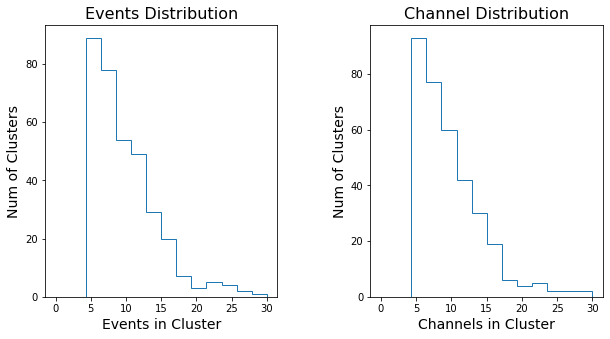

In [112]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
#fig.suptitle('Horizontally stacked subplots')
plt.subplots_adjust(wspace=.4)

ax1.set_title("Events Distribution", fontsize=16)
ax1.set_xlabel("Events in Cluster", fontsize=14)
ax1.set_ylabel("Num of Clusters", fontsize=14)
#ax1.hist(messydata.get_clusterdf()["Events"], np.linspace(0,30,31), histtype='step', color='r')
ax1.hist(data.get_clusterdf()["Events"], np.linspace(0,30,15), histtype='step')



ax2.set_title("Channel Distribution", fontsize=16)
ax2.set_xlabel("Channels in Cluster", fontsize=14)
ax2.set_ylabel("Num of Clusters", fontsize=14)
#ax2.hist(messydata.get_clusterdf()["Channels"], np.linspace(0,30,31), histtype='step', color='r')
array = ax2.hist(data.get_clusterdf()["Channels"], np.linspace(0,30,15), histtype='step')


plt.savefig('plots/pdf/Event+Channel_Dist.pdf',bbox_inches = "tight")
plt.savefig('plots/png/Event+Channel_Dist.png',dpi=300,bbox_inches = "tight")

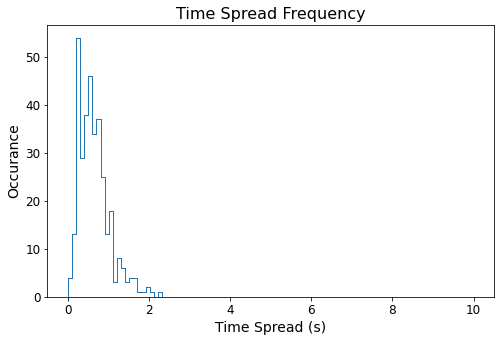

In [113]:
plt.figure(figsize=(8,5))
array = plt.hist(messydata.get_clusterdf()["TimeSpread"],np.linspace(0,10,100), histtype='step', color='r')
array = plt.hist(data.get_clusterdf()["TimeSpread"],np.linspace(0,10,100), histtype='step')
plt.title("Time Spread Frequency", fontsize=16)
plt.xlabel("Time Spread (s)", fontsize=14)
plt.ylabel("Occurance", fontsize=14)
plt.tick_params(labelsize=12) #adjust fontsize of axis ticks

#plt.ylim(0,50)

#plt.savefig('plots/pdf/Pre_TimeSpread.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/Pre_TimeSpread.png',dpi=300,bbox_inches = "tight")


#plt.figure()
#plt.title("Time Spread Frequency (filtered)", fontsize=16)
#plt.xlabel("Time Spread (s)", fontsize=14)
#plt.ylabel("Occurance", fontsize=14)

#plt.ylim(0,50)

plt.savefig('plots/pdf/TimeSpread.pdf',bbox_inches = "tight")
plt.savefig('plots/png/TimeSpread.png',dpi=300,bbox_inches = "tight")

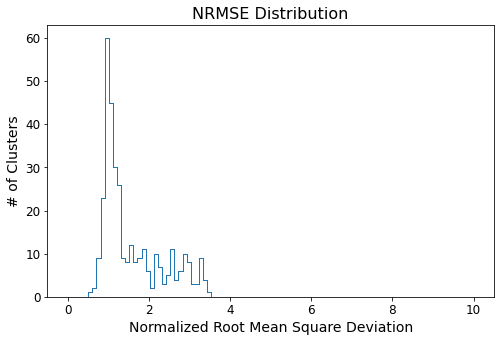

In [114]:
plt.figure(figsize=(8,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=12) #adjust fontsize of axis ticks
plt.title("NRMSE Distribution", fontsize=16)
plt.ylabel('# of Clusters',fontsize=14)
plt.xlabel('Normalized Root Mean Square Deviation',fontsize=14)

array=plt.hist(messydata.get_clusterdf()['NRMSE'], np.linspace(0,10,100), histtype='step', color='r')
array=plt.hist(data.get_clusterdf()['NRMSE'], np.linspace(0,10,100), histtype='step')

#line = plt.axvline(1)

plt.savefig('plots/pdf/NRMSE.pdf',bbox_inches = "tight")
plt.savefig('plots/png/NRMSE.png',dpi=300,bbox_inches = "tight")


#############################################################################################################
#
#plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
#plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
#plt.title("Filtered NRMSE Distribution", fontsize=18)
#plt.ylabel('# of Clusters',fontsize=16)
#plt.xlabel('Normalized Root Mean Square Deviation',fontsize=16)

#array=plt.hist(get_channelspercluster(timeclusterdata), np.linspace(0,40,41), histtype='step')

#array=plt.hist(clusterdata['Zenith(deg)'], np.linspace(0,180,181), histtype='step')


#line=plt.axvline(1)
#plt.gca().set_yscale("log")

#plt.savefig('plots/pdf/NRMSE.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/NRMSE.png',dpi=300,bbox_inches = "tight")

In [115]:
len(data.get_clusterdf())/len(messydata.get_clusterdf())

1.0

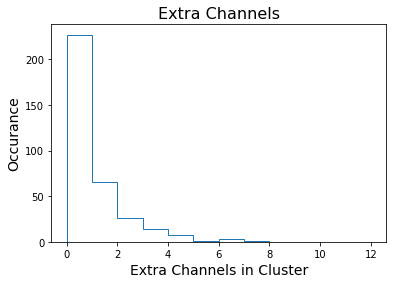

In [116]:
plt.figure()
plt.title("Extra Channels", fontsize=16)
plt.xlabel("Extra Channels in Cluster", fontsize=14)
plt.ylabel("Occurance", fontsize=14)

#array = plt.hist(messydata.get_clusterdf()['ExtraCh'], np.linspace(0,12,13), color='r', histtype='step')
#plt.gca().set_yscale("log")

#plt.savefig('plots/pdf/Pre_ExtraChannels.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/Pre_ExtraChannels.png',dpi=300,bbox_inches = "tight")


#plt.figure()
#plt.title("Extra Channels (filtered)", fontsize=16)
#plt.xlabel("Extra Channels in Cluster", fontsize=14)
#plt.ylabel("Occurance", fontsize=14)

array = plt.hist(data.get_clusterdf()['ExtraCh'], np.linspace(0,12,13), histtype='step')
#plt.gca().set_yscale("log")

#plt.savefig('plots/pdf/ExtraChannels.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/ExtraChannels.png',dpi=300,bbox_inches = "tight")

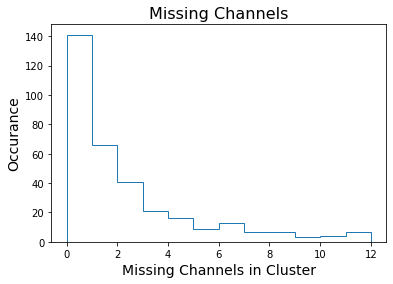

In [117]:
plt.figure()
plt.title("Missing Channels", fontsize=16)
plt.xlabel("Missing Channels in Cluster", fontsize=14)
plt.ylabel("Occurance", fontsize=14)
#array = plt.hist(messydata.get_clusterdf()['MissingCh'], np.linspace(0,12,13), color='r', histtype='step')

#plt.savefig('plots/pdf/Pre_MissingChannels.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/Pre_MissingChannels.png',dpi=300,bbox_inches = "tight")


#plt.figure()
#plt.title("Missing Channels (filtered)", fontsize=16)
#plt.xlabel("Missing Channels in Cluster", fontsize=14)
#plt.ylabel("Occurance", fontsize=14)
array = plt.hist(data.get_clusterdf()['MissingCh'], np.linspace(0,12,13), histtype='step')

#plt.savefig('plots/pdf/MissingChannels.pdf',bbox_inches = "tight")
#plt.savefig('plots/png/MissingChannels.png',dpi=300,bbox_inches = "tight")


NameError: name 'cos_theta' is not defined

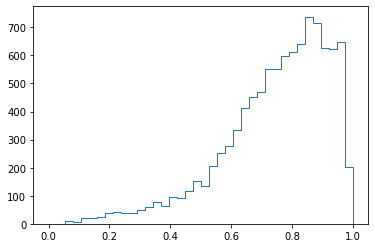

In [118]:
mc = DataAnalysis()
mc.load_eventdf('data/path/MC_events.csv')
mc.load_clusterdf('data/path/MC_clusters.csv')

plt.hist(np.cos(mc.get_clusterdf()['Zenith'].values), np.linspace(0,1,39), histtype='step')
plt.scatter(cos_theta[:,0], cos_theta[:,1] * 100/7.5)

plt.figure()
plt.hist(mc.get_clusterdf()['Azimuth'].values, np.linspace(-np.pi/2,np.pi/2,19), histtype='step')
plt.scatter(phi[:,0], phi[:,1] * 100/7.5)

In [119]:
len(np.linspace(-np.pi/2,np.pi/2,19))

19

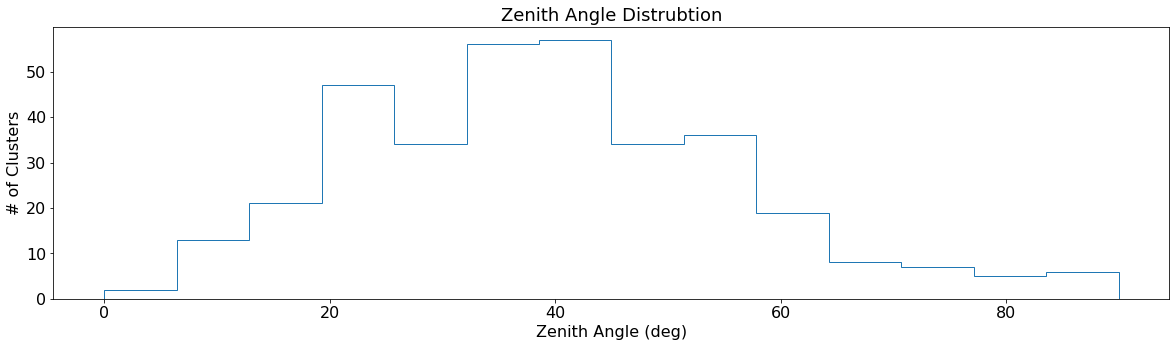

In [126]:
plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Zenith Angle Distrubtion", fontsize=18)
plt.ylabel('# of Clusters',fontsize=16)
plt.xlabel('Zenith Angle (deg)',fontsize=16)

#array=plt.hist(get_channelspercluster(timeclusterdata), np.linspace(0,40,41), histtype='step')

#array=plt.hist(clusterdata['Zenith(deg)'], np.linspace(0,100,40), histtype='step')
array=plt.hist([phi*180/np.pi for phi in data.get_clusterdf()['Zenith'].values], np.linspace(0,90,15), histtype='step')

plt.savefig('plots/pdf/Zenith.pdf',bbox_inches = "tight")
plt.savefig('plots/png/Zenith.png',dpi=300,bbox_inches = "tight")

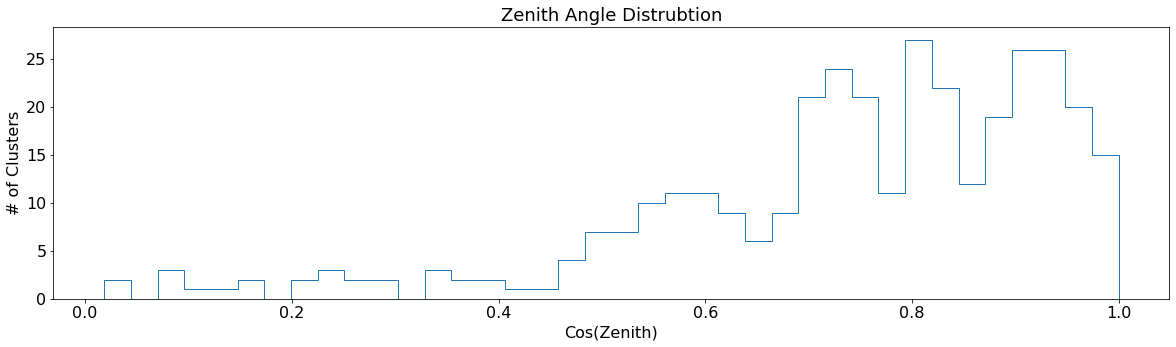

In [127]:
plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Zenith Angle Distrubtion", fontsize=18)
plt.ylabel('# of Clusters',fontsize=16)
plt.xlabel('Cos(Zenith)',fontsize=16)
array = plt.hist([math.cos(x) for x in data.get_clusterdf()['Zenith']], bins=38, histtype='step')
#plt.scatter(cos_theta[:,0], cos_theta[:,1])

plt.savefig('plots/pdf/CosZenith.pdf',bbox_inches = "tight")
plt.savefig('plots/png/CosZenith.png',dpi=300,bbox_inches = "tight")

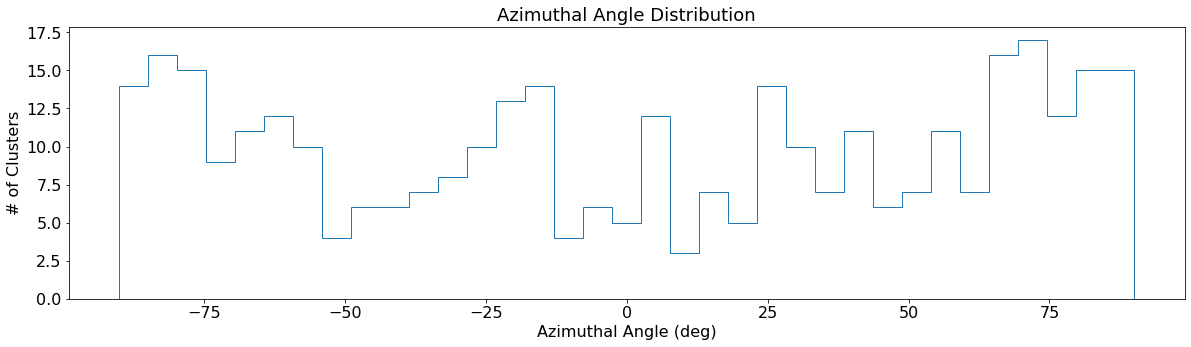

In [128]:
plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Azimuthal Angle Distribution", fontsize=18)
plt.ylabel('# of Clusters',fontsize=16)
plt.xlabel('Azimuthal Angle (deg)',fontsize=16)

#plt.ylim(0,15)

#array=plt.hist(get_channelspercluster(timeclusterdata), np.linspace(0,40,41), histtype='step')

#array=plt.hist(clusterdata['Zenith(deg)'], np.linspace(0,100,40), histtype='step')
array=plt.hist([phi*180/np.pi for phi in data.get_clusterdf()['Azimuth']], np.linspace(-90,90,36), histtype='step')
#plt.scatter(phi[:,0], phi[:,1])


plt.savefig('plots/pdf/Azimuth.pdf',bbox_inches = "tight")
plt.savefig('plots/png/Azimuth.png',dpi=300,bbox_inches = "tight")

Text(0, 0.5, 'cos(theta)')

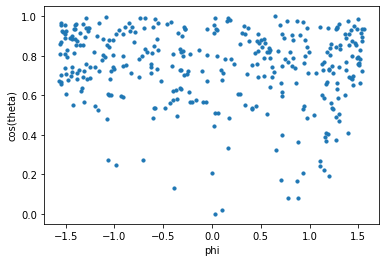

In [32]:
plt.scatter(data.get_clusterdf()['Azimuth'], np.cos(data.get_clusterdf()['Zenith'].values), s=10)
plt.xlabel("phi")
plt.ylabel("cos(theta)")

In [33]:
hist = np.load('data/exposure.npy')

bins = [36,38]
real_data, xedges, yedges = np.histogram2d(data.get_clusterdf()['Azimuth'].values, np.cos(data.get_clusterdf()['Zenith'].values), bins=bins, range=[[-np.pi/2, np.pi/2], [0, 1]])

adjusted_data = real_data / hist

In [34]:
#xpos = (xedges[:-1] + np.pi / bins[0] * 1/2) * 180 / np.pi
xpos = (xedges[:-1] + np.pi / bins[0] * 1/2) * 180 / np.pi
ypos = (yedges[:-1] + 1 / bins[1] * 1/2)

In [35]:
print(np.sum(phis))
print(np.sum(thetas))
print(np.sum(phi[:,1]))
print(np.sum(cos_theta[:,1]))


print(len(phis))
print(len(thetas))
print(len(phi[:,1]))
print(len(cos_theta[:,1]))

NameError: name 'phis' is not defined

/Users/julianyocum/opt/anaconda3/envs/UROP/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).
  """


NameError: name 'phi' is not defined

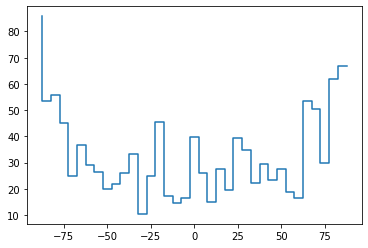

In [36]:
phis = np.sum(adjusted_data, axis=1)
thetas = np.sum(adjusted_data, axis=0)

plt.figure()
plt.plot(xpos, phis, ls='steps')
plt.scatter(phi[:,0], phi[:,1])

plt.figure()
plt.plot(ypos, thetas, ls='steps')
plt.scatter(cos_theta[:,0], cos_theta[:,1])

(array([ 2.,  0.,  0.,  2.,  0.,  1.,  2.,  3.,  1.,  2.,  3.,  0.,  2.,
         2.,  2.,  4.,  1.,  1.,  6.,  5., 12., 11., 11.,  9.,  7., 15.,
        15., 25., 25., 11., 21., 22., 19., 21., 20., 29., 20., 14.]),
 array([4.39999801e-05, 2.63549627e-02, 5.26659253e-02, 7.89768880e-02,
        1.05287851e-01, 1.31598813e-01, 1.57909776e-01, 1.84220739e-01,
        2.10531701e-01, 2.36842664e-01, 2.63153627e-01, 2.89464589e-01,
        3.15775552e-01, 3.42086515e-01, 3.68397478e-01, 3.94708440e-01,
        4.21019403e-01, 4.47330366e-01, 4.73641328e-01, 4.99952291e-01,
        5.26263254e-01, 5.52574216e-01, 5.78885179e-01, 6.05196142e-01,
        6.31507104e-01, 6.57818067e-01, 6.84129030e-01, 7.10439992e-01,
        7.36750955e-01, 7.63061918e-01, 7.89372880e-01, 8.15683843e-01,
        8.41994806e-01, 8.68305769e-01, 8.94616731e-01, 9.20927694e-01,
        9.47238657e-01, 9.73549619e-01, 9.99860582e-01]),
 <a list of 1 Patch objects>)

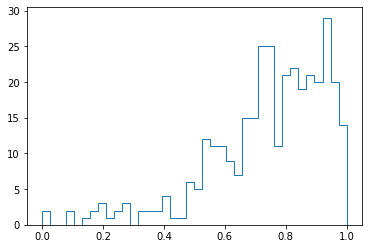

In [37]:
plt.hist(np.cos(data.get_clusterdf()['Zenith']), histtype='step', bins=38)

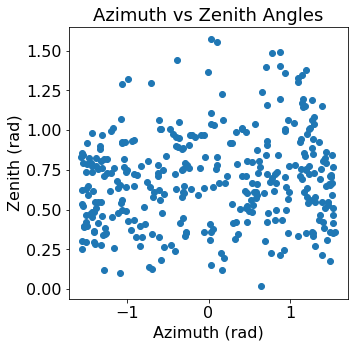

In [38]:
plt.figure(figsize=(5,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Azimuth vs Zenith Angles", fontsize=18)
plt.xlabel('Azimuth (rad)',fontsize=16)
plt.ylabel('Zenith (rad)',fontsize=16)

array = plt.scatter(data.get_clusterdf()['Azimuth'], data.get_clusterdf()['Zenith'])

plt.savefig('plots/pdf/Azimuth_vs_Zenith.pdf',bbox_inches = "tight")
plt.savefig('plots/png/Azimuth_vs_Zenith.png',dpi=300,bbox_inches = "tight")

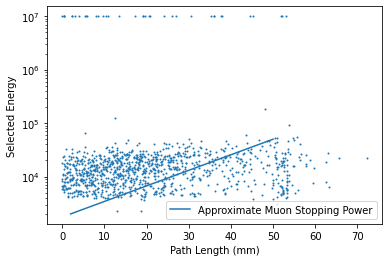

In [39]:
channeldata = data.get_eventdf()[data.get_eventdf()['Channel'] == 819]


quietdata = data.get_eventdf()[(data.get_eventdf()['Baseline'] + data.get_eventdf()['MaxToBaseline']) < 9000]
skim = quietdata[quietdata['PathLength'] < 50]
direct = quietdata[quietdata['PathLength'] > 50]

plt.xlabel("Path Length (mm)")
plt.ylabel("Selected Energy")
plt.scatter(quietdata['PathLength'], quietdata['StabAmp'], s=1)
plt.plot([10/5,10*5], [10000/5, 10000*5], label="Approximate Muon Stopping Power")
plt.legend()

#plt.gca().set_xscale("log")
plt.gca().set_yscale("log")





#plt.figure()

#plt.xlabel("Path Length (mm)")
#plt.ylabel("Selected Energy")
#plt.scatter(direct['PathLength'], direct['SelectedEnergy'], s=5)
#plt.gca().set_yscale("log")
#plt.gca().set_xscale("log")

In [40]:
data.get_eventdf()[(data.get_eventdf()['PathLength'] < 1) & (data.get_eventdf()['SelectedEnergy'] < .5e4)]

,Run,Channel,Time,NumPulses,OFdelay,MaxPosInWindow,SelectedEnergy,Baseline,MaxToBaseline,StabAmp,IsSaturated,MaxTime,Cluster,Hit,PathLength
97,350260,740,76693.232,1,3.133213,3.130,4903.131051,-4800.488973,3756.112600,6529.992841,False,76696.362,10,True,0.297412
2712,350263,324,318868.336,1,3.139079,3.178,4638.277121,-2743.117630,2091.674149,5990.202478,False,318871.514,78,True,0.893113
2793,350264,311,370419.400,2,3.148790,3.266,4183.417210,-2307.535253,2300.405584,5791.445352,False,370422.666,89,True,0.308324
3246,350265,955,457469.968,1,3.177726,3.170,3674.166506,-3511.127482,3536.361705,5829.656909,False,457473.138,117,True,0.974874
5066,350270,794,946996.296,1,3.180014,3.179,4035.924183,-3557.897898,3613.172862,5500.030968,False,946999.475,213,True,0.448797
5919,350274,595,1231761.160,1,3.166241,3.164,4191.547852,-3279.626892,3204.484985,5737.795078,False,1231764.324,272,True,0.036515
7271,350276,135,1481787.200,1,3.161279,3.161,4943.435798,-3792.263494,3519.012914,6569.691861,False,1481790.361,331,True,0.073926
8319,350285,515,2221387.648,1,3.176679,3.168,3627.611622,-3999.671071,2844.744771,5142.067422,False,2221390.816,433,True,0.348171
8947,350289,801,2584045.704,1,3.187486,3.182,4909.434391,-5792.431071,3357.288554,6664.412564,False,2584048.886,480,True,0.588803
9804,350292,223,2747003.216,1,3.144897,3.136,4889.899344,-3436.164413,1692.279373,6273.911083,False,2747006.352,504,True,0.273037


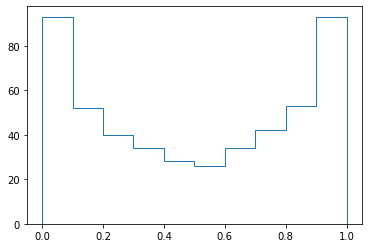

In [41]:
from sklearn.metrics import r2_score

chs = []
r2 = []
for ch in data.get_eventdf()['Channel'].unique():
    channeldata = data.get_eventdf()[data.get_eventdf()['Channel'] == ch]
    #channeldata = channeldata[channeldata['PathLength'] > 50]
    #channeldata = channeldata[(channeldata['Baseline'] + channeldata['MaxToBaseline']) > 9000]
    channeldata = channeldata[channeldata['Hit'] == True]
    n = len(channeldata)
    
    if n < 3:
        continue
    else:
        chs.append(ch)
        
    z = np.polyfit(channeldata['PathLength'], channeldata['SelectedEnergy'], 1)
    f = np.poly1d(z)

    y_true = channeldata['SelectedEnergy'].values
    y_pred = f(channeldata['PathLength'].values)

    r2.append(r2_score(y_true, y_pred))
    
array = plt.hist(r2, histtype='step')

In [42]:
r2

[0.9362279727655582,
 0.2901855349656609,
 0.6787567124437752,
 0.18127618064808582,
 0.03949111121140625,
 0.5244798097089263,
 0.31210945357752085,
 0.6449535544289151,
 0.09795014457899631,
 0.2949906336585002,
 0.7124855397655716,
 0.033810010779814714,
 0.8586099083449795,
 0.10594741728878765,
 0.9999994841040556,
 0.12273436910640778,
 0.4113517718412546,
 0.19187760754592498,
 0.4126496262749475,
 0.9895467990750082,
 0.0045213508957909765,
 0.8942902243382379,
 0.050048960462766745,
 0.15111942411735246,
 0.2844780519301344,
 0.4246267897247633,
 0.10534055303163625,
 0.1594871847181102,
 0.030799582009090054,
 0.13596620845837193,
 0.7993821587665167,
 0.5475292958892097,
 0.23148986550533013,
 0.8234534414660166,
 0.05825505438143741,
 0.2850996739199535,
 0.8269247309755315,
 0.7956833759220515,
 0.37205425030752015,
 0.2674594678098192,
 0.818656068356981,
 0.8559235789865607,
 0.63582748560903,
 0.6417064541906965,
 0.42084339770771984,
 0.012779208916735785,
 0.317471543

In [43]:
chs

[939,
 938,
 819,
 940,
 818,
 390,
 376,
 27,
 28,
 767,
 738,
 739,
 737,
 753,
 562,
 443,
 444,
 723,
 481,
 724,
 685,
 722,
 707,
 706,
 576,
 721,
 821,
 795,
 822,
 794,
 613,
 588,
 90,
 810,
 91,
 798,
 175,
 160,
 854,
 841,
 881,
 137,
 832,
 805,
 842,
 752,
 657,
 211,
 740,
 658,
 671,
 751,
 834,
 212,
 836,
 876,
 891,
 931,
 892,
 837,
 932,
 977,
 980,
 978,
 917,
 902,
 916,
 937,
 915,
 472,
 274,
 365,
 405,
 471,
 485,
 366,
 350,
 463,
 434,
 461,
 462,
 650,
 280,
 732,
 744,
 743,
 664,
 925,
 600,
 873,
 590,
 963,
 105,
 889,
 976,
 899,
 926,
 622,
 608,
 924,
 386,
 402,
 381,
 382,
 389,
 384,
 385,
 383,
 639,
 474,
 473,
 627,
 488,
 487,
 198,
 136,
 197,
 199,
 135,
 184,
 321,
 359,
 322,
 347,
 335,
 336,
 337,
 314,
 231,
 791,
 242,
 793,
 241,
 230,
 806,
 920,
 895,
 422,
 529,
 505,
 528,
 883,
 884,
 845,
 918,
 906,
 908,
 582,
 864,
 815,
 851,
 865,
 147,
 878,
 519,
 520,
 469,
 573,
 587,
 852,
 138,
 875,
 166,
 142,
 154,
 130,
 687,
 7

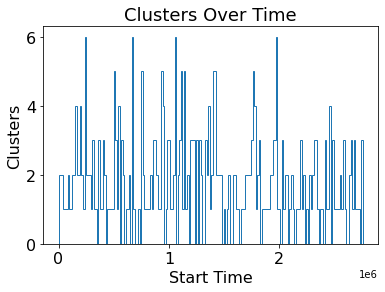

In [44]:
# plt.figure(figsize=(20,5)) # lets you make a custom size for your plot
plt.tick_params(labelsize=16) #adjust fontsize of axis ticks
plt.title("Clusters Over Time", fontsize=18)
plt.ylabel('Clusters',fontsize=16)
plt.xlabel('Start Time',fontsize=16)
array=plt.hist(data.get_clusterdf()['StartTime'], np.linspace(0,2760000,200), histtype='step')
#plt.gca().set_yscale("log")

plt.savefig('plots/pdf/ClusterTimes.pdf',bbox_inches = "tight")
plt.savefig('plots/png/ClusterTimes.png',dpi=300,bbox_inches = "tight")